<a href="https://colab.research.google.com/github/jatin-42/OIBSIP/blob/main/Iris_Flower_Classification.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

Importing the dependencies

In [1]:
import numpy as np
import pandas as pd
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn import svm
from sklearn.metrics import accuracy_score

Data collection and data preprocessing

In [2]:
iris_dataset = pd.read_csv('/content/Iris.csv')

In [3]:
iris_dataset.shape

(150, 6)

In [4]:
iris_dataset.describe()

,Id,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm
count,150.000000,150.000000,150.000000,150.000000,150.000000
mean,75.500000,5.843333,3.054000,3.758667,1.198667
std,43.445368,0.828066,0.433594,1.764420,0.763161
min,1.000000,4.300000,2.000000,1.000000,0.100000
25%,38.250000,5.100000,2.800000,1.600000,0.300000
50%,75.500000,5.800000,3.000000,4.350000,1.300000
75%,112.750000,6.400000,3.300000,5.100000,1.800000
max,150.000000,7.900000,4.400000,6.900000,2.500000


In [5]:
iris_dataset.isnull().sum()

Id               0
SepalLengthCm    0
SepalWidthCm     0
PetalLengthCm    0
PetalWidthCm     0
Species          0
dtype: int64

Label Encoding

In [6]:
iris_dataset.replace({"Species":{'Iris-setosa':1 , 'Iris-versicolor':2 , 'Iris-virginica':3}}, inplace = True)


In [7]:
iris_dataset.head()

,Id,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm,Species
0,1,5.1,3.5,1.4,0.2,1
1,2,4.9,3.0,1.4,0.2,1
2,3,4.7,3.2,1.3,0.2,1
3,4,4.6,3.1,1.5,0.2,1
4,5,5.0,3.6,1.4,0.2,1


In [8]:
iris_dataset.shape

(150, 6)

In [9]:
iris_dataset['Species'].value_counts()

1    50
2    50
3    50
Name: Species, dtype: int64

Data Visualization

<Axes: xlabel='SepalLengthCm', ylabel='count'>

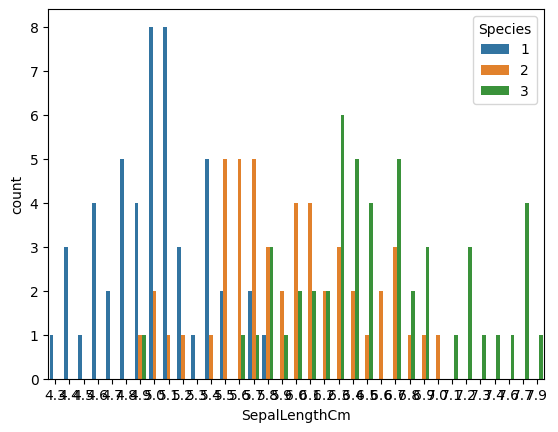

In [13]:
sns.countplot(x= 'SepalLengthCm', hue= 'Species', data = iris_dataset)

Separating the data and labels

In [15]:
X = iris_dataset.drop(columns=['Id', 'Species'],axis =1 )
Y = iris_dataset['Species']

In [16]:
print(X)

     SepalLengthCm  SepalWidthCm  PetalLengthCm  PetalWidthCm
0              5.1           3.5            1.4           0.2
1              4.9           3.0            1.4           0.2
2              4.7           3.2            1.3           0.2
3              4.6           3.1            1.5           0.2
4              5.0           3.6            1.4           0.2
..             ...           ...            ...           ...
145            6.7           3.0            5.2           2.3
146            6.3           2.5            5.0           1.9
147            6.5           3.0            5.2           2.0
148            6.2           3.4            5.4           2.3
149            5.9           3.0            5.1           1.8

[150 rows x 4 columns]


In [17]:
print(Y)

0      1
1      1
2      1
3      1
4      1
      ..
145    3
146    3
147    3
148    3
149    3
Name: Species, Length: 150, dtype: int64


Train_Test_Split

In [18]:
X_Train, X_Test, Y_Train, Y_Test = train_test_split(X,Y,test_size=0.1, stratify = Y, random_state= 2)

In [19]:
print(X.shape, X_Train.shape , X_Test.shape )

(150, 4) (135, 4) (15, 4)


Training the model

Support Vector Machine Model

In [21]:
classifier = svm.SVC(kernel = 'linear')

Training the support vector machine model

In [22]:
classifier.fit(X_Train, Y_Train)

SVC(kernel='linear')

Model Evaluation

accuracy score on training data

In [23]:
X_Train_Prediction = classifier.predict(X_Train)
training_data_accuracy = accuracy_score(X_Train_Prediction, Y_Train)

In [26]:
print('Accuracy score on training data:', training_data_accuracy)

Accuracy score on training data: 0.9925925925925926


accuracy score on test data

In [27]:
X_Test_Prediction = classifier.predict(X_Test)
test_data_accuracy = accuracy_score(X_Test_Prediction, Y_Test)

In [28]:
print('Accuracy score on test data:', test_data_accuracy)

Accuracy score on test data: 0.9333333333333333


Making a predictive System

In [31]:
input_data = (5.1,	3.5,	1.4,	0.2)
input_data_as_numpy_array = np.array(input_data)

In [33]:
input_data_reshaped = input_data_as_numpy_array.reshape(1,-1)
prediction = classifier.predict(input_data_reshaped)

/usr/local/lib/python3.10/dist-packages/sklearn/base.py:439: UserWarning: X does not have valid feature names, but SVC was fitted with feature names
  warnings.warn(


In [34]:
print(prediction)
if(prediction[0]==1):
  print('Flower is of Iris-setosa species.')
elif(prediciton[0]==2 ):
  print('Flower is of Iris-versicolor species.')
else :
  print('Flower is of Iris-virginica species')

[1]
Flower is of Iris-setosa species.
